# Extended Project #3: Unsupervised Learning
## Patient Clustering
### BSE Computational Machine Learning I.

In [1]:
### Import relevant libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import datetime
import seaborn as sns
from pandas.core.common import flatten
from sklearn.linear_model import LogisticRegression

In [2]:
# Set wroking directory
os.chdir("/Users/pazma/Documents/BSE/cml/project-3_unsupervised/")

In [3]:
# Import functions 
%run project3-functions.ipynb

In [4]:
# Import the dataset
raw=pd.read_csv("mimic_unsupervised/mimic_unsupervised_features")
raw.describe()

,Unnamed: 0,subject_id,hadm_id,icustay_id,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,...,TempC_Min,TempC_Max,TempC_Mean,SpO2_Min,SpO2_Max,SpO2_Mean,Glucose_Min,Glucose_Max,Glucose_Mean,Diff
count,17476.000000,17476.000000,17476.000000,17476.000000,17476.000000,17476.000000,17476.000000,17476.000000,17476.000000,17476.000000,...,17476.000000,17476.000000,17476.000000,17476.000000,17476.000000,17476.000000,17476.000000,17476.000000,17476.000000,17476.000000
mean,10452.169947,62173.413138,150031.280213,250111.655356,69.854372,105.251534,85.198794,91.209087,150.800240,119.237119,...,36.052377,37.435625,36.754474,91.102598,99.560254,96.881776,105.882622,183.999714,138.939116,-51552.957991
std,6030.004139,24382.336465,28836.136655,28870.467019,14.708514,20.927182,15.315221,17.288428,23.698171,16.656093,...,0.712555,0.782992,0.584004,6.963839,1.077526,2.162487,33.303488,94.753942,44.258443,10688.840523
min,0.000000,23.000000,100001.000000,200001.000000,2.000000,39.000000,34.714286,5.000000,70.000000,50.863636,...,15.000000,30.800000,30.666667,1.000000,67.000000,55.692308,2.000000,51.000000,43.250000,-72740.274440
25%,5238.750000,46816.000000,125184.500000,225088.750000,60.000000,90.000000,74.189732,81.000000,134.000000,107.146825,...,35.666667,36.944444,36.394444,90.000000,100.000000,95.808306,86.000000,127.000000,110.777778,-60754.355040
50%,10451.500000,64235.000000,149941.000000,250381.500000,69.000000,103.000000,84.166667,90.000000,148.000000,117.000000,...,36.111111,37.333333,36.731481,92.000000,100.000000,97.125000,101.000000,161.000000,128.884444,-51512.365210
75%,15701.500000,82025.500000,174998.750000,275105.000000,79.000000,118.000000,95.280988,101.000000,164.000000,129.520952,...,36.500000,37.888889,37.087302,94.000000,100.000000,98.315249,121.000000,208.000000,155.125000,-42266.520832
max,20884.000000,99999.000000,199999.000000,299998.000000,137.000000,280.000000,149.676471,168.000000,323.000000,202.172414,...,40.100000,42.000000,40.238333,100.000000,100.000000,100.000000,480.000000,2440.000000,771.900000,-32157.494580


## Explore and understand the dataset (EDA)

In [5]:
# NA values, dtypes of train and test dataset
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17476 entries, 0 to 17475
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      17476 non-null  int64  
 1   subject_id      17476 non-null  int64  
 2   hadm_id         17476 non-null  int64  
 3   icustay_id      17476 non-null  int64  
 4   HeartRate_Min   17476 non-null  float64
 5   HeartRate_Max   17476 non-null  float64
 6   HeartRate_Mean  17476 non-null  float64
 7   SysBP_Min       17476 non-null  float64
 8   SysBP_Max       17476 non-null  float64
 9   SysBP_Mean      17476 non-null  float64
 10  DiasBP_Min      17476 non-null  float64
 11  DiasBP_Max      17476 non-null  float64
 12  DiasBP_Mean     17476 non-null  float64
 13  MeanBP_Min      17476 non-null  float64
 14  MeanBP_Max      17476 non-null  float64
 15  MeanBP_Mean     17476 non-null  float64
 16  RespRate_Min    17476 non-null  float64
 17  RespRate_Max    17476 non-null 

In [6]:
# select numerical variables
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns=raw.select_dtypes(include=numerics)

# look at their skewness of their distribution (Values close to 0 show less skew)
pd.DataFrame(numerical_columns.skew()).sort_values(by=0)

,0
SpO2_Max,-7.938063
SpO2_Min,-5.009340
SpO2_Mean,-3.688019
TempC_Min,-3.177910
MeanBP_Min,-0.612778
subject_id,-0.504850
TempC_Mean,-0.263644
icustay_id,-0.014227
hadm_id,-0.007473
Diff,-0.006169


Glucose_Mean, MeanBP_Max, Glucose_Max, SpO2_Max, SpO2_Min, SpO2_Mean, TempC_Min	show skewness in their distribution.

Look at their distribution graphically: 

In [7]:
len(numerical_columns.columns)

29

/var/folders/hc/qzy2rzvj5cg38v_607m73p640000gn/T/ipykernel_87296/2597795404.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  numerical_columns.hist(ax = ax)


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'subject_id'}>,
        <AxesSubplot:title={'center':'hadm_id'}>,
        <AxesSubplot:title={'center':'icustay_id'}>,
        <AxesSubplot:title={'center':'HeartRate_Min'}>],
       [<AxesSubplot:title={'center':'HeartRate_Max'}>,
        <AxesSubplot:title={'center':'HeartRate_Mean'}>,
        <AxesSubplot:title={'center':'SysBP_Min'}>,
        <AxesSubplot:title={'center':'SysBP_Max'}>,
        <AxesSubplot:title={'center':'SysBP_Mean'}>],
       [<AxesSubplot:title={'center':'DiasBP_Min'}>,
        <AxesSubplot:title={'center':'DiasBP_Max'}>,
        <AxesSubplot:title={'center':'DiasBP_Mean'}>,
        <AxesSubplot:title={'center':'MeanBP_Min'}>,
        <AxesSubplot:title={'center':'MeanBP_Max'}>],
       [<AxesSubplot:title={'center':'MeanBP_Mean'}>,
        <AxesSubplot:title={'center':'RespRate_Min'}>,
        <AxesSubplot:title={'center':'RespRate_Max'}>,
        <AxesSubplot:title={'cen

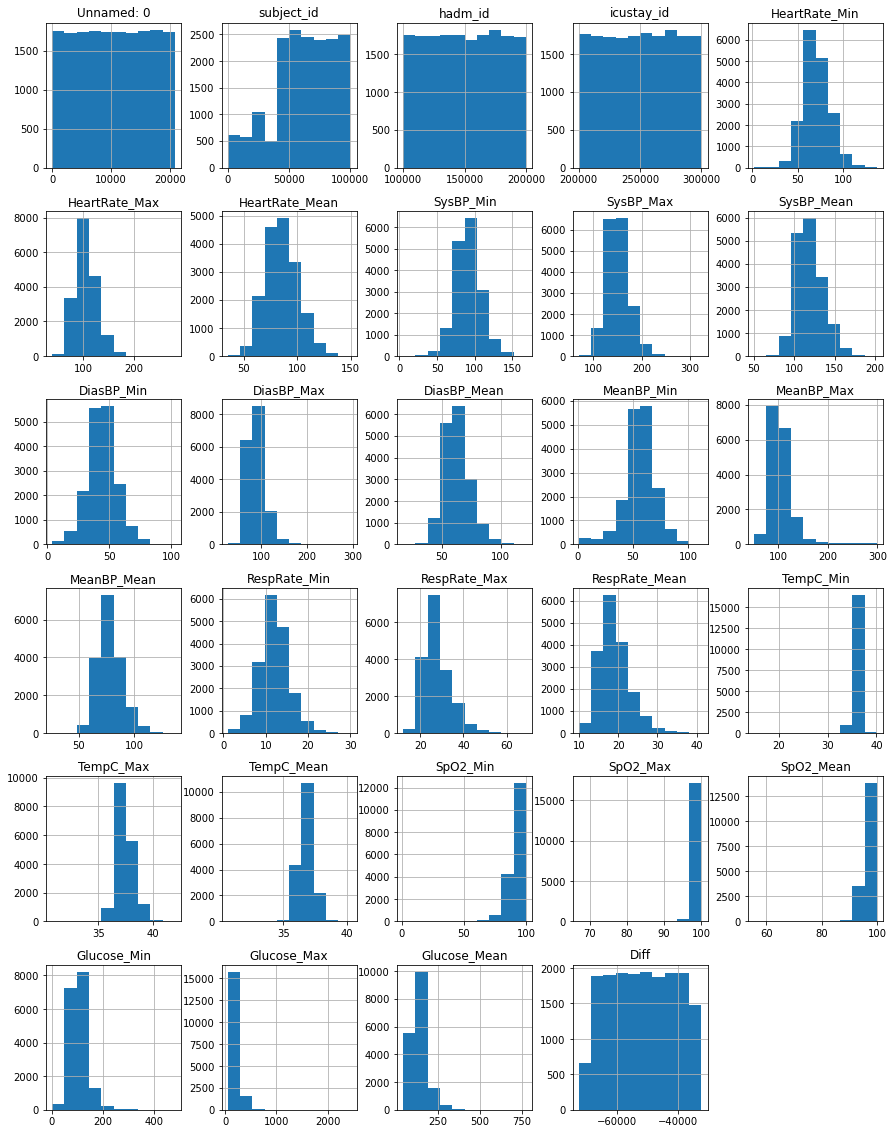

In [8]:
# plot histogram of each numerical columns to see their skewness visually
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
numerical_columns.hist(ax = ax)

In [9]:
# Remove all non numeric columns (e.g ID's, dates and categories)
cluster_num_df=raw[list(numerical_columns.columns)]
cluster_num_df=cluster_num_df.drop(columns=["Unnamed: 0",'subject_id', 'hadm_id', 'icustay_id' ])

In [10]:
# Standardization
scaler=StandardScaler()
scaler.fit(cluster_num_df)
scaled_num_1=scaler.transform(cluster_num_df)

## Clustering with numerical variables only

### Check the ideal number of dimensions for SVD

New coordinate vectors


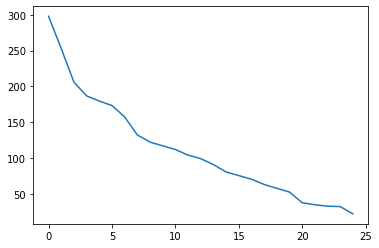

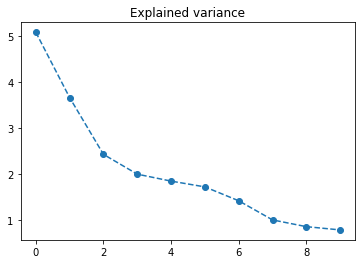

Optimal low-rank approximation


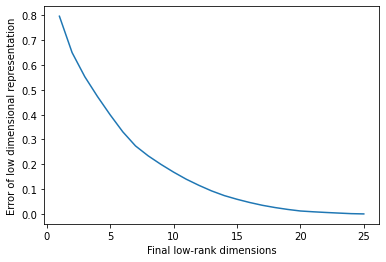

Drop in error


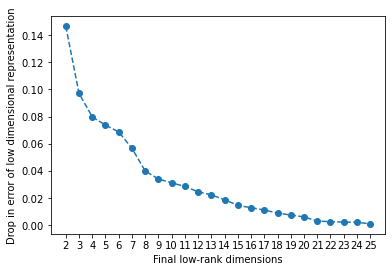

In [11]:
svd_optimal_dimensions(scaled_num_1)

Based on these outputs the number of dimensions for SVD is 2

In [12]:
# fit SVD
n_components=2    
svd_scores_1=fit_transform_svd(n_components, scaled_num_1)

## Determine ideal number of clusters for numerical columns ( K-means )

Methods used to select the number of clusters: 
- Elbow method
- Silhouette Coefficient
- Gap statistics


SVD_SCORES_1
Elbow method:


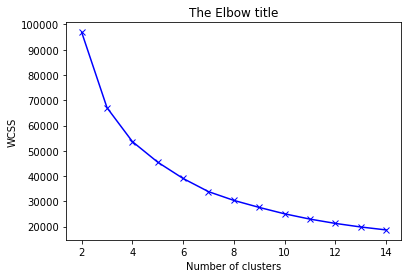

Silhouette coefficient


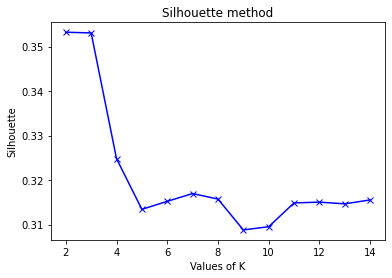

Max average silhouette score is : 0.35322  for n_clusters = 2
Gap statistics:
Optimal clusters:  2


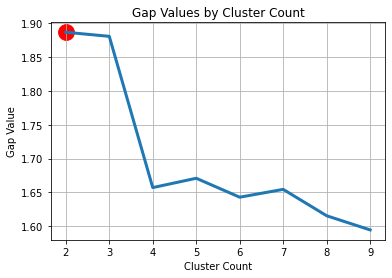

with minimum value 'method' the optimal number of clusters is: [2.]


In [13]:
X=svd_scores_1
K=range(2,15)
data=["svd_scores_1"]

for i in range(len(data)):
    print(data[i].upper())
    find_the_ideal_number_of_clusters_kmeans(eval(data[i]), K)

**The optimal number of clusters is 2 according to the silhoutte score and the minimum value method, but if we look at the graphs we can see a drop at cluster number 4 and 8 in the case of Gap value. If we look at the Silhouette method we see a drop at 4-5 and 9 number of clusters.**
So as a consequence, I decided to look at how the clustering algorithm perform with these number of clusters.  

### Fit K-means on numerical data

/Users/pazma/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


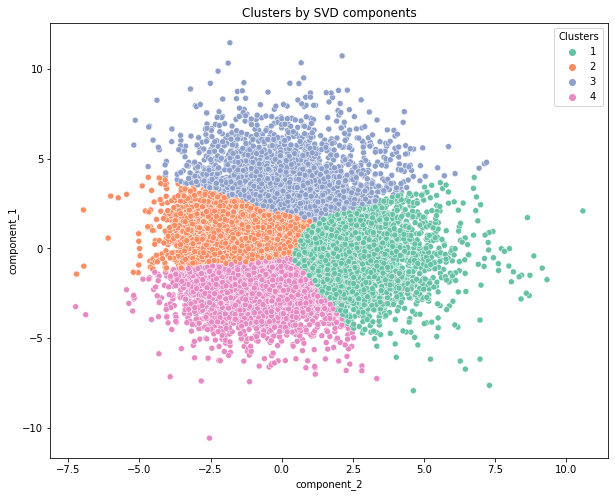

/Users/pazma/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


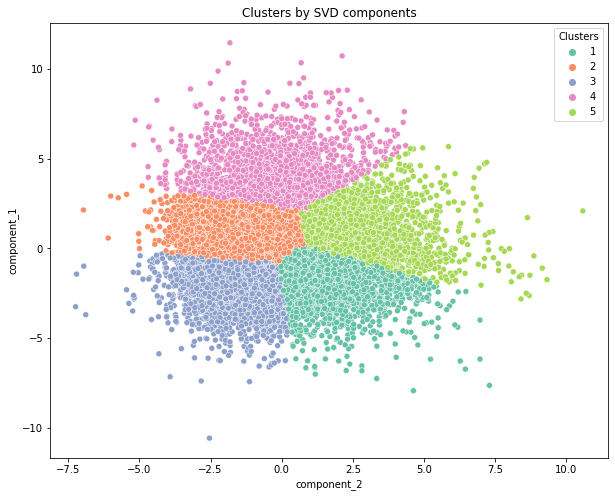

/Users/pazma/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


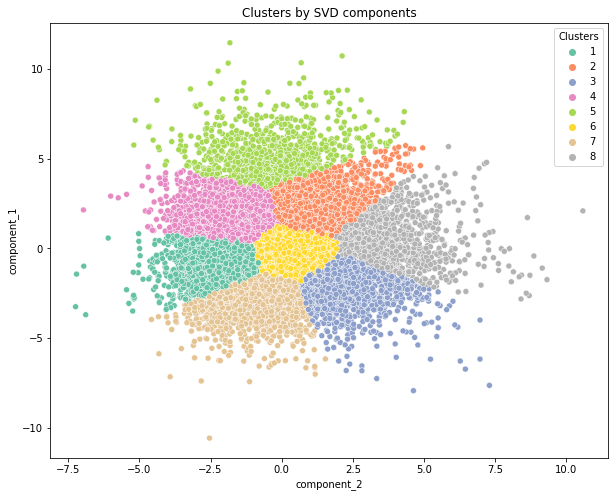

/Users/pazma/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


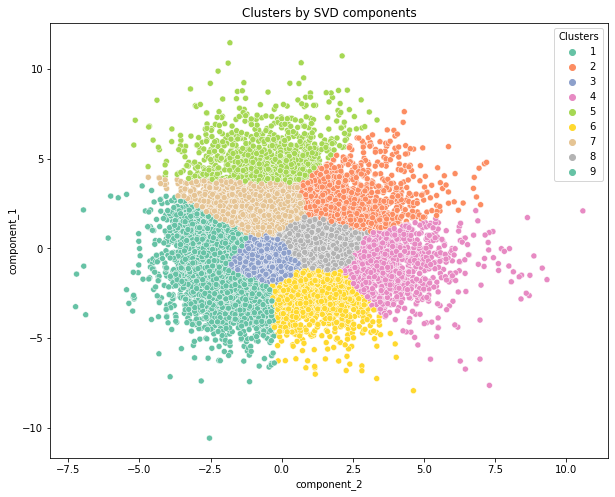

,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,DiasBP_Min,DiasBP_Max,DiasBP_Mean,MeanBP_Min,...,SpO2_Max,SpO2_Mean,Glucose_Min,Glucose_Max,Glucose_Mean,Diff,component_1,component_2,segment_kmeans_svd,clusters
0,89.0,145.0,121.043478,74.0,127.0,106.586957,42.0,90.0,61.173913,59.0,...,99.0,95.739130,111.0,230.0,160.777778,-61961.78470,-0.934249,2.606998,3,4
1,63.0,110.0,79.117647,89.0,121.0,106.733333,49.0,74.0,64.733333,58.0,...,100.0,99.058824,103.0,103.0,103.000000,-43146.18378,-0.952312,-1.496893,2,3
2,81.0,98.0,91.689655,88.0,138.0,112.785714,45.0,67.0,56.821429,64.0,...,100.0,100.000000,132.0,346.0,217.636364,-42009.96157,-0.641789,-0.582006,2,3
3,76.0,128.0,98.857143,84.0,135.0,106.972973,30.0,89.0,41.864865,48.0,...,100.0,95.085714,108.0,139.0,125.000000,-43585.37922,-2.207083,3.897202,3,4
4,70.0,130.0,97.951220,107.0,155.0,128.414634,60.0,88.0,74.780488,72.0,...,100.0,98.878049,92.0,142.0,104.400000,-51044.77754,2.120752,-0.882937,6,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17471,65.0,92.0,78.500000,60.0,160.0,110.976190,34.0,94.0,56.595238,41.0,...,100.0,99.833333,68.0,139.0,103.571429,-60714.92678,-2.093469,-1.955310,0,1
17472,74.0,112.0,89.156250,100.0,150.0,123.272727,58.0,83.0,67.818182,74.0,...,100.0,97.531250,184.0,377.0,245.400000,-46217.77777,1.833983,0.123798,6,7
17473,58.0,97.0,76.933333,94.0,131.0,112.037037,55.0,83.0,67.370370,66.0,...,100.0,99.200000,51.0,460.0,190.000000,-39830.10848,0.190652,-0.776821,2,3
17474,59.0,102.0,81.844444,96.0,150.0,123.837209,47.0,85.0,60.232558,65.0,...,100.0,96.311111,91.0,91.0,91.000000,-59205.26841,-0.030211,-0.515664,2,3


In [14]:
# using 4 clusters 
fit_kmeans_on_svd(n_clusters=4, n_components=2, svd_scores=svd_scores_1, df_original=cluster_num_df)

# using 5 clusters 
fit_kmeans_on_svd(n_clusters=5, n_components=2, svd_scores=svd_scores_1, df_original=cluster_num_df)

# using 8 clusters 
fit_kmeans_on_svd(n_clusters=8, n_components=2, svd_scores=svd_scores_1, df_original=cluster_num_df)

# using 9 clusters 
fit_kmeans_on_svd(n_clusters=9, n_components=2, svd_scores=svd_scores_1, df_original=cluster_num_df)

**Conclusions:** I feel like that working with 2 clusters will not properly show us various patient characteristics our will not help us to differentiate among different outcomes. All the graphs with all the cluster numbers show well defined cluster borders. Maybe in the case of 9 clusters, the clusters are that nicely separated. 

In order to make a beter decision about the ideal number of clusters, I will include the categorical variables as dummies. 

## Manage categorical and date features 

Manage the date variables e.g. try to create an Age variable, and manage categorial features e.g. create dummy variables for relevant categorical features. See how this affects your clustering

In [15]:
df_cat_2=raw.copy()
categorical_cols=df_cat_2.select_dtypes("object").columns

### Create Age variable

I will need the DOB, ADMITTIME, and Diff variables to create the age variable. 

DOB: date of birth, but if we look at it, we can see, that they are not real birthdates. Based on the variable description file we need the Diff variable which is the number of days that needs to added to DOB to get the true birthdates of patients. 

In [16]:
df_cat_2.DOB.head(10)

0    2108-07-16 00:00:00
1    2087-01-16 00:00:00
2    2057-09-17 00:00:00
3    2056-02-27 00:00:00
4    2102-06-04 00:00:00
5    2107-03-27 00:00:00
6    2103-11-21 00:00:00
7    2089-09-14 00:00:00
8    2032-05-26 00:00:00
9    1805-09-07 00:00:00
Name: DOB, dtype: object

In [17]:
### create age variable

# create date format from DOB
df_cat_2["year_of_birth"]=pd.to_datetime(df_cat_2["DOB"], format= "%Y-%m-%d")

# add Diff variable to year_of_birth
df_cat_2["year_of_birth"]=df_cat_2["year_of_birth"]+ pd.to_timedelta(df_cat_2.Diff, unit="d")
# get the year 
df_cat_2["year_of_birth"]=df_cat_2["year_of_birth"].dt.strftime("%Y").astype(int)


# create date format from admission time
df_cat_2["admission_year"]=pd.to_datetime(df_cat_2["ADMITTIME"], format= "%Y-%m-%d")
# add Diff variable 
df_cat_2["admission_year"]=df_cat_2["admission_year"]+ pd.to_timedelta(df_cat_2.Diff, unit="d")
# get the year 
df_cat_2["admission_year"]=df_cat_2["admission_year"].dt.strftime("%Y").astype(int)

### determine age
df_cat_2["age"]=df_cat_2["admission_year"]-df_cat_2["year_of_birth"]

count    17476.000000
mean        75.101225
std         55.024871
min         15.000000
25%         53.000000
50%         66.000000
75%         78.000000
max        310.000000
Name: age, dtype: float64


/Users/pazma/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

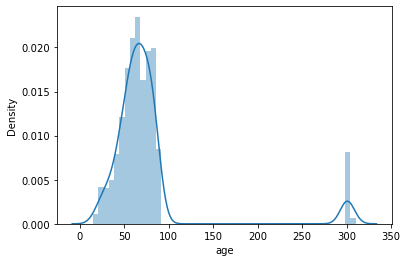

In [18]:
# Distribution of the age variable
print(df_cat_2["age"].describe())
sns.distplot(df_cat_2["age"])

In [19]:
pd.set_option("display.max_row", 101)
print("Number of unqique ages in the data:", len(df_cat_2.age.unique()))

Number of unqique ages in the data: 86


There are outliers: age around 300 and way above 100. Drop them? 

The mean value is pretty high: 75 years, which indicates that most of the people in the data are senior. 

I learned that usually the classify some old patients who are above 85 differently because of privacy issues, so I figured that I create a dummy for those patients and don't drop the individuals who are above 100. 

It is also worth considering of creating age groups since we have a lot of observations and the variance of age is quite large, so that I don't end up with hundreds/thousands of dummy category variables.


I am goint to use the WHO's age standards (In 2015, the World Health Organization under the United Nations officially revised the age standards. https://journals.scholarpublishing.org/index.php/ASSRJ/article/view/2924): 
- the young age is from 25 to 44,
- middle age is 44-60, 
- elderly age is 60-75, 
- senile age is 75-90,
- long-livers are after 90.

In [20]:
# create age groups
df_cat_2["age_groups"]=np.where((df_cat_2.age<25), "below_25", "no age")
df_cat_2["age_groups"]=np.where((df_cat_2.age>=25)&(df_cat_2.age<=44),"young age",df_cat_2["age_groups"])
df_cat_2["age_groups"]=np.where((df_cat_2.age>44)&(df_cat_2.age<=60),"middle age",df_cat_2["age_groups"])
df_cat_2["age_groups"]=np.where((df_cat_2.age>60)&(df_cat_2.age<=75),"senile age",df_cat_2["age_groups"])
df_cat_2["age_groups"]=np.where((df_cat_2.age>75)&(df_cat_2.age<=90),"long-livers",df_cat_2["age_groups"])
df_cat_2["age_groups"]=np.where((df_cat_2.age>90),"above_90",df_cat_2["age_groups"])


In [21]:
# check if everybody has an age
df_cat_2.loc[df_cat_2["age_groups"]=="no age"]

,Unnamed: 0,subject_id,hadm_id,icustay_id,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,...,RELIGION,MARITAL_STATUS,ETHNICITY,DIAGNOSIS,ICD9_diagnosis,FIRST_CAREUNIT,year_of_birth,admission_year,age,age_groups


senile age     5593
middle age     4428
long-livers    4265
young age      1920
above_90        903
below_25        367
Name: age_groups, dtype: int64


/Users/pazma/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_groups', ylabel='count'>

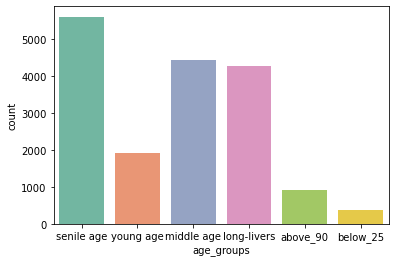

In [22]:
# look at the distribution of new groups
print(df_cat_2['age_groups'].value_counts())
sns.countplot(df_cat_2.age_groups, palette="Set2")

In [23]:
df_cat_2=df_cat_2.drop(columns=["age", "ADMITTIME"])

### Manage other categorical variables

In [24]:
# remove age related column names from my list of categorical variables to look at other columns' value counts
categorical_cols=list(categorical_cols)
categorical_cols.remove("DOB")
categorical_cols.remove("ADMITTIME")

In [25]:
for cat in categorical_cols:
    print(cat, ":\n", df_cat_2[cat].value_counts())

GENDER :
 M    9757
F    7719
Name: GENDER, dtype: int64
ADMISSION_TYPE :
 EMERGENCY    14934
ELECTIVE      2354
URGENT         188
Name: ADMISSION_TYPE, dtype: int64
INSURANCE :
 Medicare      9817
Private       5210
Medicaid      1810
Government     516
Self Pay       123
Name: INSURANCE, dtype: int64
RELIGION :
 CATHOLIC                  6536
NOT SPECIFIED             4619
PROTESTANT QUAKER         2286
JEWISH                    1573
UNOBTAINABLE              1002
OTHER                      575
EPISCOPALIAN               247
GREEK ORTHODOX             153
CHRISTIAN SCIENTIST        145
BUDDHIST                    94
MUSLIM                      68
UNITARIAN-UNIVERSALIST      44
JEHOVAH'S WITNESS           41
HINDU                       34
ROMANIAN EAST. ORTH         30
7TH DAY ADVENTIST           28
HEBREW                       1
Name: RELIGION, dtype: int64
MARITAL_STATUS :
 MARRIED              8334
SINGLE               5201
WIDOWED              2392
DIVORCED             1242
SEPAR

Based on this output I'll create from: 
- GENDER: male dummy
- ADMISSION_TYPE: category dummies
- INSURANCE: category dummy 
- MARITAL_STATUS: category dummies
- ETHNICITY: white, black, hispanic, asian and other category dummies
- FIRST_CAREUNIT: category dummies


- requires more consideration, I need to group them together because of their uneven distribution:
    - RELIGION, DIAGNOSIS, ICD9_diagnosis

#### Create ETHNICITY categories

In [26]:
df_cat_2["ETHNICITY"].value_counts()

WHITE                                                       12801
BLACK/AFRICAN AMERICAN                                       1741
HISPANIC OR LATINO                                            492
OTHER                                                         414
UNABLE TO OBTAIN                                              344
UNKNOWN/NOT SPECIFIED                                         287
ASIAN                                                         220
PATIENT DECLINED TO ANSWER                                    152
HISPANIC/LATINO - PUERTO RICAN                                133
ASIAN - CHINESE                                               129
BLACK/CAPE VERDEAN                                            112
WHITE - RUSSIAN                                               108
BLACK/HAITIAN                                                  66
ASIAN - ASIAN INDIAN                                           57
HISPANIC/LATINO - DOMINICAN                                    48
MULTI RACE

We can see that there are major ethnicity groups in the data, from which I can create aggregated groups. There is either a / or a - sign after the major ethnicity category of each patient. This gives me the ethnicity groups that I am going to create and aggregate.  

In [27]:
### ethnicity groups: 
##  white, hispanic, asian, black, other, declined to answer/unknown/unable to obtain 

df_cat_2['ETHNICITY_orig']=df_cat_2['ETHNICITY'] # keep original column for safety 

# create new grouped ethnicity categories 
ethnicity_columns=["white", "hispanic", "asian", "black", "other"]
ethnicity_groups=[e.upper() for e in ethnicity_columns]
zip_iterator = zip(ethnicity_groups, ethnicity_columns) # Get pairs of elements.
ethnicity_dictionary = dict(zip_iterator) # Convert to dictionary.

for k, v in ethnicity_dictionary.items():
    df_cat_2.loc[df_cat_2['ETHNICITY'].str.startswith(k, na=False), 'ETHNICITY'] = v
    
# create additional other and unknown categories from the remaining ones 
df_cat_2['ETHNICITY']=np.where((df_cat_2['ETHNICITY']=="UNABLE TO OBTAIN")|
                         (df_cat_2['ETHNICITY']=="UNKNOWN/NOT SPECIFIED")|
                         (df_cat_2['ETHNICITY']=="PATIENT DECLINED TO ANSWER"), 
                          "unknown", df_cat_2['ETHNICITY'])


# put remaining categories into the 'other' category
# remaining categories: all written in uppercase letter, so filter for those values 
df_cat_2['ETHNICITY']=np.where(df_cat_2['ETHNICITY'].str.isupper(), "other", df_cat_2['ETHNICITY'])

white       12993
black        1940
unknown       783
hispanic      738
other         546
asian         476
Name: ETHNICITY, dtype: int64


/Users/pazma/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ETHNICITY', ylabel='count'>

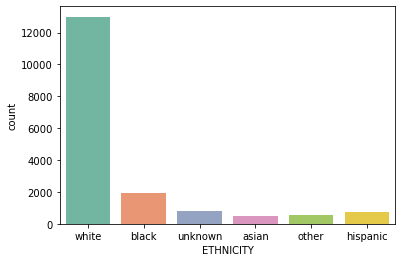

In [28]:
# look at the distribution of new groups
print(df_cat_2['ETHNICITY'].value_counts())
sns.countplot(df_cat_2.ETHNICITY, palette="Set2")

In [29]:
# drop original column
df_cat_2=df_cat_2.drop(columns=['ETHNICITY_orig'])

#### Religion variable

In [30]:
df_cat_2.RELIGION.value_counts()

CATHOLIC                  6536
NOT SPECIFIED             4619
PROTESTANT QUAKER         2286
JEWISH                    1573
UNOBTAINABLE              1002
OTHER                      575
EPISCOPALIAN               247
GREEK ORTHODOX             153
CHRISTIAN SCIENTIST        145
BUDDHIST                    94
MUSLIM                      68
UNITARIAN-UNIVERSALIST      44
JEHOVAH'S WITNESS           41
HINDU                       34
ROMANIAN EAST. ORTH         30
7TH DAY ADVENTIST           28
HEBREW                       1
Name: RELIGION, dtype: int64

Worldwide percentage of adherents by religion, 2015

  - Christianity (31.2%)
  - Islam (24.1%)
  - Irreligion (16%)
  - Hinduism (15.1%)
  - Buddhism (6.9%)
  - Folk religions (5.7%)
  - Other religions (0.5%)
  - Sikhism (0.3%)
  - Judaism (0.2%)

Based on this we could group the religions according to this in our dataset. However if we would group protestant and catholics together we would have large imbalance. Also if we would keep hindus as a separate group the distrubution would be really unbalanced. It would worth to separate the various religions because they behave differently which has psychological effect or have different dietary restrictions, but since we would face large imbalance within this category, on the "data-level" it is not worth to do that, because those observations would be "lost" otherwise. 

So taken everything into condsideration I am working with the following categories: 
- catholic
- protestant
- jewish
- unobtainable
- other




Also it is worth to consider the possibility of just creating one dummy, which is 1 if the person is religous and 0 otherwise. (I am creating that option now, and when I am clustering I'll run the clustering with both options to whether it makes a difference.)

In [31]:
df_cat_2["RELIGION"]=df_cat_2["RELIGION"].replace(["NOT SPECIFIED", "HEBREW"], ["UNOBTAINABLE", "JEWISH"])
df_cat_2["RELIGION"]=df_cat_2["RELIGION"].replace(["EPISCOPALIAN" ,
                                        "GREEK ORTHODOX",
                                        "CHRISTIAN SCIENTIST",
                                        "BUDDHIST",         
                                        "MUSLIM",                    
                                        "UNITARIAN-UNIVERSALIST",     
                                        "JEHOVAH'S WITNESS",        
                                        "HINDU",                     
                                        "ROMANIAN EAST. ORTH",         
                                        "7TH DAY ADVENTIST"], "OTHER")

CATHOLIC             6536
UNOBTAINABLE         5621
PROTESTANT QUAKER    2286
JEWISH               1574
OTHER                1459
Name: RELIGION, dtype: int64


/Users/pazma/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RELIGION', ylabel='count'>

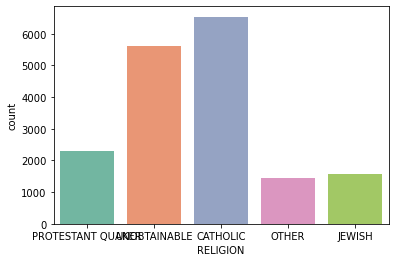

In [32]:
# look at the distribution of new groups
print(df_cat_2.RELIGION.value_counts())
sns.countplot(df_cat_2.RELIGION, palette="Set2")

### Create dummies from the created new categories and drop unnecesary columns

In [33]:
# keep the dataframe with the category groups for later 
# because I'll compare patient characteristics and outcomes with clusters
df_cat_dummies_2=df_cat_2.copy()

In [34]:
# get dummies
df_cat_dummies_2["male"]=np.where(df_cat_dummies_2.GENDER=="M",1,0)
df_cat_dummies_2=get_dummies(df_cat_dummies_2,["RELIGION", "ETHNICITY", "GENDER", "age_groups",
                    "ADMISSION_TYPE", "INSURANCE", "MARITAL_STATUS", "FIRST_CAREUNIT"] )

# drop: year_of_birth,admission_year,DOB,Diff, Unnamed: 0
# drop also DIAGNOSIS columns because they are still string and cannot be incorporated so far
df_cat_dummies_2=df_cat_dummies_2.drop(columns=["year_of_birth","admission_year","DOB","Diff", "Unnamed: 0", 
                     'DIAGNOSIS','ICD9_diagnosis'])

In [35]:
# check NA
df_cat_dummies_2.isnull().values.any()

False

## Clustering with the new categorical variables

In [36]:
# check if all columns are numeric
df_cat_dummies_2.select_dtypes(include="object").columns

Index([], dtype='object')

In [37]:
# Standardization
scaler=StandardScaler()
scaler.fit(df_cat_dummies_2)
cat_scaled_2=scaler.transform(df_cat_dummies_2)

I am going to work with the previously determined number of components for the SVD. 
While working on this project I checked the ideal number of dimensions for SVD and I got 2 every time, that is why I am not going to involve again the graphs and the analysis to search for the optimal number of components. 

In [38]:
# fit SVD
n_components=2    
svd_scores_2=fit_transform_svd(n_components, cat_scaled_2)

SVD_SCORES_2
Elbow method:


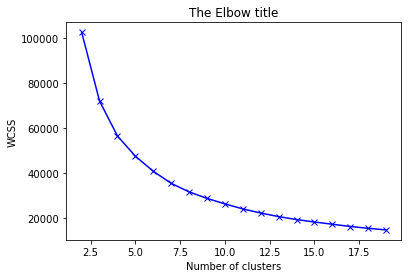

Silhouette coefficient


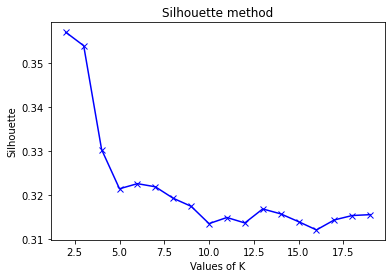

Max average silhouette score is : 0.35706  for n_clusters = 2
Gap statistics:
Optimal clusters:  3


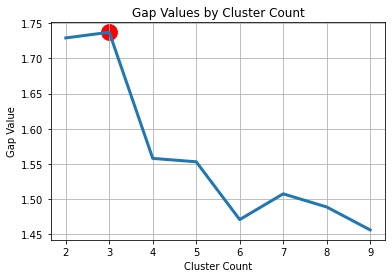

with minimum value 'method' the optimal number of clusters is: [3.]


In [39]:
# Determine ideal number of clusters for K-means
K=range(2,20)
data=["svd_scores_2"]

for i in range(len(data)):
    print(data[i].upper())
    find_the_ideal_number_of_clusters_kmeans(eval(data[i]), K)

**Based on the Silhouette graph there is a drop at cluster number 5 (and maybe at 3) and additional one at cluster number 10, but according to the Silhouette score the ideal number of clusters are still 2. Based on the Gap Values, we can also see a drop at 5 clusters and an additional one at 7. Based on this I would go on with 5 clusters, but will also look at the performance of 7 and 10 clusters.**


### Fit K-Means on categorical variables

/Users/pazma/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


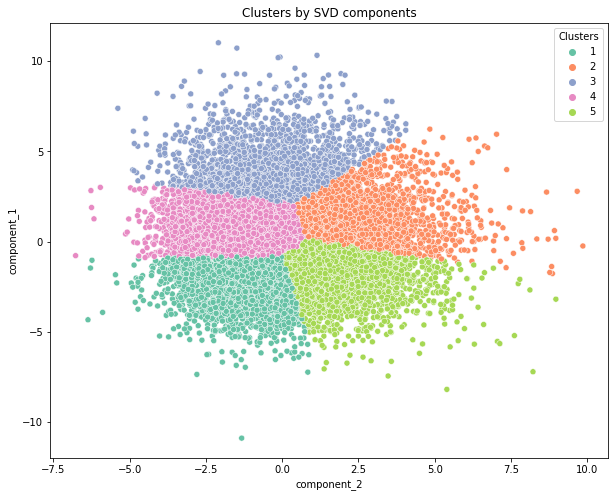

/Users/pazma/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


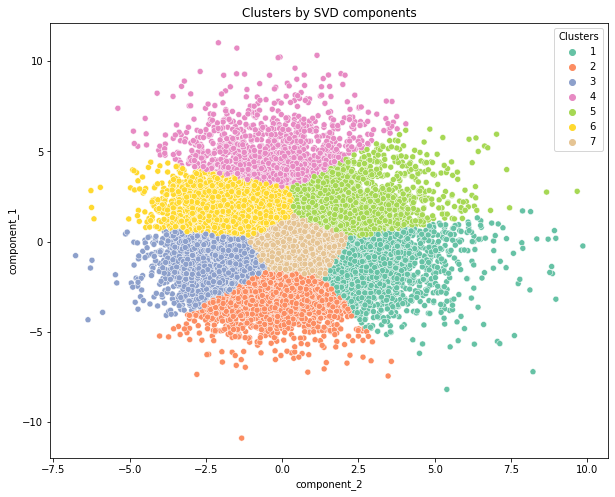

/Users/pazma/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


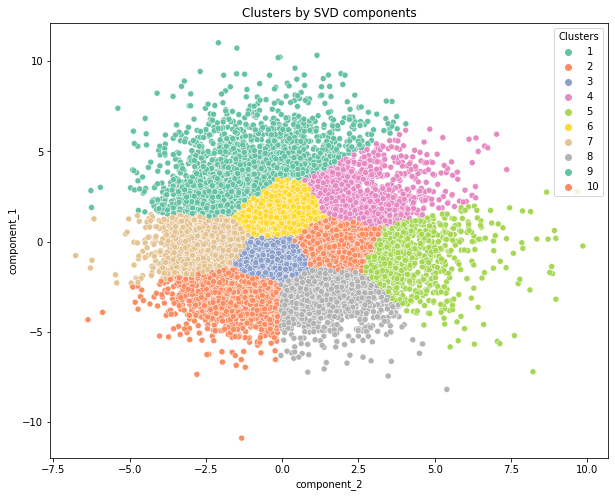

In [40]:
cluster5_df=fit_kmeans_on_svd(n_clusters=5, n_components=2, svd_scores=svd_scores_2, df_original=df_cat_2)
cluster7_df=fit_kmeans_on_svd(n_clusters=7, n_components=2, svd_scores=svd_scores_2, df_original=df_cat_2)
cluster10_df=fit_kmeans_on_svd(n_clusters=10, n_components=2, svd_scores=svd_scores_2, df_original=df_cat_2)

If we look at the graphs below, we can see that the clusters are still well determined in the case of all clusters. I think the best will be to decide about the number of clusters when comparing patients' diagnoses and then their death ratio. Hopefully in that case I will see some differences among clusters, which will help me to determine the ideal number of clusters to work with. 

### Cluster analysis: comparing patients' characteristics across clusters

In [41]:
# add clusters as new columns to the original dataframe
original_data=df_cat_2.copy()

df_cat_2["cluster5"]=cluster5_df.clusters.values
df_cat_2["cluster7"]=cluster7_df.clusters.values
df_cat_2["cluster10"]=cluster10_df.clusters.values

In [42]:
# check for missing values
df_cat_2.isnull().values.any()

False

In [43]:
cluster_analysis_cols=['GENDER',
                    'ADMISSION_TYPE',
                    'INSURANCE',
                    'RELIGION',
                    'MARITAL_STATUS',
                    'ETHNICITY',
                    'DIAGNOSIS',
                    'ICD9_diagnosis',
                    'FIRST_CAREUNIT',
                    'age_groups']

**Patient characteristics by clusters:** Most common values by the categorical variables 

In [44]:
# 3 clusters
df_cat_2.groupby('cluster5')[cluster_analysis_cols].apply(pd.DataFrame.mode).reset_index(drop=True)

,GENDER,ADMISSION_TYPE,INSURANCE,RELIGION,MARITAL_STATUS,ETHNICITY,DIAGNOSIS,ICD9_diagnosis,FIRST_CAREUNIT,age_groups
0,M,EMERGENCY,Medicare,CATHOLIC,MARRIED,white,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,41401,MICU,long-livers
1,M,EMERGENCY,Private,UNOBTAINABLE,SINGLE,white,PNEUMONIA,0389,MICU,middle age
2,M,EMERGENCY,Private,UNOBTAINABLE,SINGLE,white,ALTERED MENTAL STATUS,29181,MICU,middle age
3,M,EMERGENCY,Medicare,CATHOLIC,MARRIED,white,INTRACRANIAL HEMORRHAGE,41401,MICU,senile age
4,F,EMERGENCY,Medicare,CATHOLIC,MARRIED,white,PNEUMONIA,0389,MICU,long-livers


In [45]:
# 7 clusters
df_cat_2.groupby('cluster7')[cluster_analysis_cols].apply(pd.DataFrame.mode).reset_index(drop=True).dropna()

,GENDER,ADMISSION_TYPE,INSURANCE,RELIGION,MARITAL_STATUS,ETHNICITY,DIAGNOSIS,ICD9_diagnosis,FIRST_CAREUNIT,age_groups
0,F,EMERGENCY,Medicare,CATHOLIC,MARRIED,white,PNEUMONIA,0389,MICU,senile age
1,F,EMERGENCY,Medicare,CATHOLIC,MARRIED,white,PNEUMONIA,0389,MICU,long-livers
2,M,EMERGENCY,Medicare,CATHOLIC,MARRIED,white,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,41401,CSRU,senile age
3,M,EMERGENCY,Private,UNOBTAINABLE,SINGLE,white,ALTERED MENTAL STATUS,29181,MICU,middle age
4,M,EMERGENCY,Private,UNOBTAINABLE,SINGLE,white,PNEUMONIA,0389,MICU,middle age
5,M,EMERGENCY,Private,UNOBTAINABLE,MARRIED,white,INTRACRANIAL HEMORRHAGE,431,SICU,middle age
6,M,EMERGENCY,Medicare,CATHOLIC,MARRIED,white,PNEUMONIA,41401,MICU,senile age


In [46]:
# 10 clusters
df_cat_2.groupby('cluster10')[cluster_analysis_cols].apply(pd.DataFrame.mode).reset_index(drop=True).dropna()

,GENDER,ADMISSION_TYPE,INSURANCE,RELIGION,MARITAL_STATUS,ETHNICITY,DIAGNOSIS,ICD9_diagnosis,FIRST_CAREUNIT,age_groups
0,M,EMERGENCY,Private,UNOBTAINABLE,MARRIED,white,STROKE;TELEMETRY;TRANSIENT ISCHEMIC ATTACK,431,SICU,middle age
1,F,EMERGENCY,Medicare,CATHOLIC,MARRIED,white,PNEUMONIA,0389,MICU,senile age
2,M,EMERGENCY,Medicare,CATHOLIC,MARRIED,white,PNEUMONIA,41401,MICU,senile age
3,M,EMERGENCY,Private,UNOBTAINABLE,SINGLE,white,PNEUMONIA,0389,MICU,middle age
4,F,EMERGENCY,Medicare,CATHOLIC,MARRIED,white,PNEUMONIA,0389,MICU,senile age
5,M,EMERGENCY,Private,UNOBTAINABLE,MARRIED,white,ALTERED MENTAL STATUS,431,MICU,middle age
6,M,EMERGENCY,Medicare,CATHOLIC,MARRIED,white,INTRACRANIAL HEMORRHAGE,41401,SICU,senile age
7,F,EMERGENCY,Medicare,CATHOLIC,MARRIED,white,PNEUMONIA,0389,MICU,long-livers
8,M,EMERGENCY,Private,UNOBTAINABLE,SINGLE,white,ALTERED MENTAL STATUS,29181,MICU,middle age
9,M,EMERGENCY,Medicare,CATHOLIC,MARRIED,white,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,41401,CSRU,long-livers


Based on these outputs we can see some differences and variety in the created clusters, mostly in their age_group and in their diagnosis, but still there are clusters with the same diagnosis or for example the most common marital status in each cluster is usually married or sometimes single. 

Religion also does not make a difference in clustering neither ethnicity nor marital status. 

**Look at categorical variables' distributions by 5 clusters**

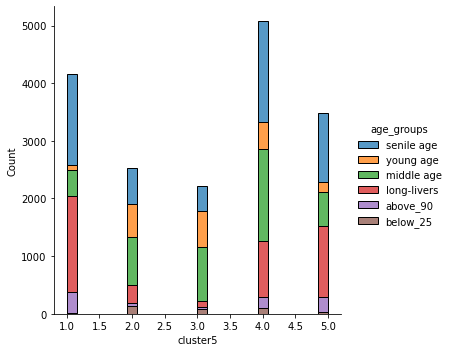

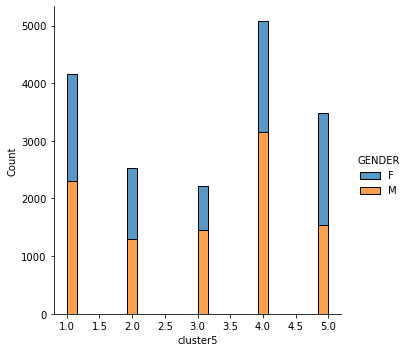

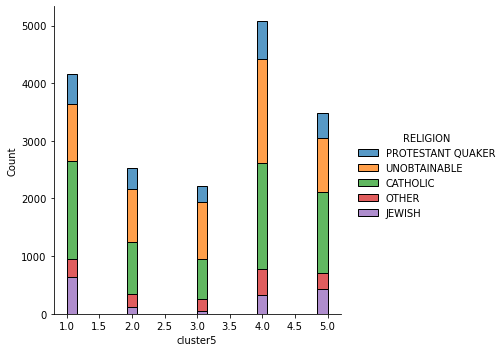

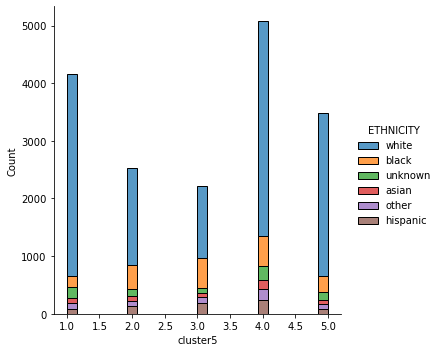

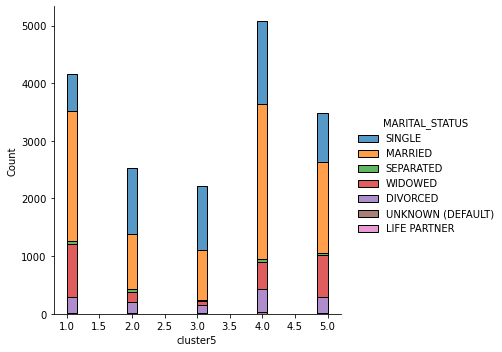

In [47]:
sns.displot(df_cat_2, x="cluster5", hue="age_groups", multiple="stack")
sns.displot(df_cat_2, x="cluster5", hue="GENDER", multiple="stack")
sns.displot(df_cat_2, x="cluster5", hue="RELIGION", multiple="stack")
sns.displot(df_cat_2, x="cluster5", hue="ETHNICITY", multiple="stack")
sns.displot(df_cat_2, x="cluster5", hue="MARITAL_STATUS", multiple="stack")

From these graphs we can see that usually the most frequent categories dominate in each cluster. There is some variety, for example in the case of age groups, but on the other hand in the case of gender there is not much difference among clusters. Probably that is because it has 2 categories, so that is why there is more variety in categorical variables with more groups. 

## Incorporate the comorbidity information.

My strategy here is to determine the main diagnosis of one patient and create a dummy from that, and the comorbidity information is going to be included in the form of counting the number of diagnoses each patient has. 

In [48]:
# import MIMIC_diagnosis file from extra data, to merge with metadata diagnose dataset and count the number of diagnoses each patient has
diagnosis_df=pd.read_csv("mimic_unsupervised/extra_data/MIMIC_diagnoses.csv")
diagnosis_df.columns = [x.lower() for x in diagnosis_df.columns]
print(diagnosis_df.shape)
diagnosis_df.head()

(651047, 4)


,subject_id,hadm_id,seq_num,icd9_code
0,256,108811,1.0,53240
1,256,108811,2.0,41071
2,256,108811,3.0,53560
3,256,108811,4.0,40390
4,256,108811,5.0,5859


In [49]:
# merge diagnoses with metadata diagnose dataset to have a textual description of each code
diagnosis_meta=pd.read_csv("mimic_unsupervised/extra_data/MIMIC_metadata_diagnose.csv")
diagnosis_meta.columns = [x.lower() for x in diagnosis_meta.columns]
print(diagnosis_meta.shape)
diagnosis_df=pd.merge(diagnosis_df, diagnosis_meta, on="icd9_code", how="left")
diagnosis_df=diagnosis_df.drop(columns="short_diagnose")
diagnosis_df.head()

(14567, 3)


,subject_id,hadm_id,seq_num,icd9_code,long_diagnose
0,256,108811,1.0,53240,Chronic or unspecified duodenal ulcer with hem...
1,256,108811,2.0,41071,"Subendocardial infarction, initial episode of ..."
2,256,108811,3.0,53560,"Duodenitis, without mention of hemorrhage"
3,256,108811,4.0,40390,"Hypertensive chronic kidney disease, unspecifi..."
4,256,108811,5.0,5859,"Chronic kidney disease, unspecified"


We can see that to one patient more than one ICD9_CODE (diagnosis) belongs. This can help us to determine the presence of comorbidities because in the original data only one ICD9 code is available per patient. And it is hard to interpret and handle the DIAGNOSIS column in the original data because it contains the free text of diagnosis, so it would rather be a text mining project to extract meaningful information from that column. 

In [50]:
# counting the number of icd9 codes per patient and their hospital stay identifier
number_of_diagnoses=pd.DataFrame(diagnosis_df.groupby(["subject_id", "hadm_id"])["subject_id"].count())

# rename subject id
number_of_diagnoses=number_of_diagnoses.rename(columns={"subject_id": "id"})
number_of_diagnoses=number_of_diagnoses.reset_index()

# new column names
number_of_diagnoses.columns=["subject_id", "hadm_id", "diagnosis_count"]

number_of_diagnoses.shape
number_of_diagnoses.head()


,subject_id,hadm_id,diagnosis_count
0,2,163353,3
1,3,145834,9
2,4,185777,9
3,5,178980,3
4,6,107064,8


In [51]:
# look at the largest number of diagnoses of each patient/hospital stay
number_of_diagnoses.sort_values('diagnosis_count', ascending=False)

,subject_id,hadm_id,diagnosis_count
47132,62795,173748,39
57429,95201,192304,39
55012,87692,196705,39
6204,5090,184896,39
42794,49555,111955,39
...,...,...,...
6072,5008,176430,1
37662,30940,110368,1
15229,12401,180086,1
10152,8303,164003,1


Is this possible that one patient has that many comobidities? 

/Users/pazma/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


([<matplotlib.axis.XTick at 0x7f8498c2e7f0>,
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8')])

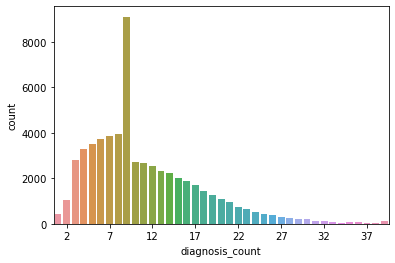

In [52]:
sns.countplot(number_of_diagnoses["diagnosis_count"])
plt.xticks(np.arange(1, 40, 5.0))

There is a peak at 9 diagnoses. 

****************************************
Also if we look at closely the long diagnose column we can see that there are too many different diagnoses with small differences, for example: 
- Light-for-dates" without mention of fetal malnutrition, 1,000- 1,249 grams
- "Light-for-dates" without mention of fetal malnutrition, 1,500- 1,749 grams

So, I decided to aggregate these codes on a higher level for better interpretation purposes and not to have that many dummies when clustering. 

On Wikipedia, I found this page: https://en.wikipedia.org/wiki/List_of_ICD-9_codes, which classifies ICD9 codes into bigger categories. 

I am going to apply this classification to the data.

- codes 001–139: infectious and parasitic diseases
- codes 140–239: neoplasms
- codes 240–279: endocrine, nutritional and metabolic diseases, and immunity disorders
- codes 280–289: diseases of the blood and blood-forming organs
- codes 290–319: mental disorders
- codes 320–389: diseases of the nervous system and sense organs
- codes 390–459: diseases of the circulatory system
- codes 460–519: diseases of the respiratory system
- codes 520–579: diseases of the digestive system
- codes 580–629: diseases of the genitourinary system
- codes 630–679: complications of pregnancy, childbirth, and the puerperium
- codes 680–709: diseases of the skin and subcutaneous tissue
- codes 710–739: diseases of the musculoskeletal system and connective tissue
- codes 740–759: congenital anomalies
- codes 760–779: certain conditions originating in the perinatal period
- codes 780–799: symptoms, signs, and ill-defined conditions
- codes 800–999: injury and poisoning
- codes E and V codes: external causes of injury and supplemental classification

These are 3 digit numbers but I can apply them on this data, because the first three digits determine the group of the disease so that I can classify them into larger groups according to this list. 

In [53]:
# drop long diagnose column
diagnosis_groups=diagnosis_df.drop(columns="long_diagnose")

In [54]:
# leave first 3 diagnoses per patient and per hospital stay
diagnosis_groups=diagnosis_groups.groupby(["subject_id", "hadm_id"]).head(5) 

Based on the major categories I need the first 3 numbers of the icd9 code, or the first 4 if it starts with V or E. 
But I can also just cut off the last two characters so that I end up either 3 digit codes or V/E+3 digit codes. 
But after I have to deal with them as numeric variables and having string values in the column would mess up my function which converts codes to larger textual diganoses. 

In [55]:
# cut off first 3 digits from icd9 column, except if the observation starts with an E or a V, then the first 4
# create new column for icd9 grouping, replace rows with 0 if starts with V or E (= not all elements of the cell are digits )
diagnosis_groups['icd9_groups_nums'] = np.where((diagnosis_groups['icd9_code'].str.isdigit()==True),
                                           diagnosis_groups["icd9_code"].str[:3], 0)


In [56]:
# convert new column to integers, to be able to filter them according to their classification numbers
diagnosis_groups["icd9_groups_nums"]=diagnosis_groups["icd9_groups_nums"].astype(int)

In [57]:
# apply my remap function, which is based on the classification of the icd9 codes
diagnosis_groups["icd9_groups"]=list(diagnosis_groups["icd9_groups_nums"].map(remap_icd9_codes))

# drop icd9_groups_nums column because it is no longer needed
diagnosis_groups=diagnosis_groups.drop(columns=["icd9_groups_nums"])

In [58]:
# check results
diagnosis_groups.head(10)

,subject_id,hadm_id,seq_num,icd9_code,icd9_groups
0,256,108811,1.0,53240,diseases of the digestive system
1,256,108811,2.0,41071,diseases of the circulatory system
2,256,108811,3.0,53560,diseases of the digestive system
3,256,108811,4.0,40390,diseases of the circulatory system
4,256,108811,5.0,5859,diseases of the genitourinary system
11,256,153771,1.0,00845,infectious and parasitic diseases
12,256,153771,2.0,5780,diseases of the digestive system
13,256,153771,3.0,5990,diseases of the genitourinary system
14,256,153771,4.0,496,diseases of the respiratory system
15,256,153771,5.0,42731,diseases of the circulatory system


In [59]:
# merge diagnosis with number_of_diagnoses dataframe to access all the number of diagnoses per patient
diagnoses_groups_count_df=pd.merge(diagnosis_groups, number_of_diagnoses, on=["subject_id", "hadm_id"])

# merge diagnoses with categorical data (df_cat_2)
df_cat_diagnoses=pd.merge(df_cat_2, diagnoses_groups_count_df, on=["subject_id", "hadm_id"], how="left")

In the data there are diagnoses groups which are repeated at one patient. I will deal with this as setting a dummy for each diagnosis, because i think it would not contribute that much or make a difference. 

In [60]:
print(df_cat_diagnoses.shape)

(86167, 49)


In [61]:
pd.DataFrame(df_cat_diagnoses.isnull().sum().sort_values(ascending=False)).reset_index().head()

,index,0
0,Unnamed: 0,0
1,Glucose_Min,0
2,Glucose_Mean,0
3,GENDER,0
4,DOB,0


No missing values. I can move on to prepare the dataset for clustering.

### K-Means on categorical + comorbidity data

In [62]:
cluster_analysis_cols=['GENDER',
                    'ADMISSION_TYPE',
                    'INSURANCE',
                    'RELIGION',
                    'MARITAL_STATUS',
                    'ETHNICITY',
                    'DIAGNOSIS',
                    'ICD9_diagnosis',
                    'FIRST_CAREUNIT',
                    'age_groups']

In [63]:
# list of categorical variables from which I will create dummies
cluster_analysis_cols.remove("DIAGNOSIS")
cluster_analysis_cols.remove("ICD9_diagnosis")

In [64]:
# get dummies
df_cat_diagnoses_dummies=get_dummies(df_cat_diagnoses,cluster_analysis_cols )
df_cat_diagnoses_dummies=get_dummies(df_cat_diagnoses_dummies,["icd9_code"] ) # create a dummy from icd9_code (for interpretation I will use the text columns)


In [65]:
# drop duplicates
df_cat_diagnoses_dummies=df_cat_diagnoses_dummies.drop_duplicates(subset=["subject_id", "hadm_id", "icustay_id"])

In [66]:
df_cat_diagnoses_dummies.shape

(17476, 3656)

In [67]:
# check missing values
df_cat_diagnoses_dummies[df_cat_diagnoses_dummies.isnull().any(axis=1)].head(10)

,Unnamed: 0,subject_id,hadm_id,icustay_id,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,...,icd9_code_V8537,icd9_code_V854,icd9_code_V8541,icd9_code_V8542,icd9_code_V8543,icd9_code_V8544,icd9_code_V8545,icd9_code_V872,icd9_code_V8741,icd9_code_V8801


In [68]:
# drop unnecessary columns for clustering
df_cat_diagnoses_dummies=df_cat_diagnoses_dummies.drop(columns=["subject_id","hadm_id","icustay_id",
                                                              "ICD9_diagnosis", "year_of_birth", "admission_year",
                                                               "Unnamed: 0", "cluster5", "cluster7", "cluster10",
                                                                "seq_num","icd9_groups", 
                                                              'DOB', 'Diff', "DIAGNOSIS"])

In [69]:
# check if all columns are numeric
df_cat_diagnoses_dummies.select_dtypes("object").shape

(17476, 0)

In [70]:
# Standardization
scaler=StandardScaler()
scaler.fit(df_cat_diagnoses_dummies)
scaled_diagnoses=scaler.transform(df_cat_diagnoses_dummies)

In [71]:
# fit SVD
n_components=2    
svd_scores_3=fit_transform_svd(n_components, scaled_diagnoses)

SVD_SCORES_3
Elbow method:


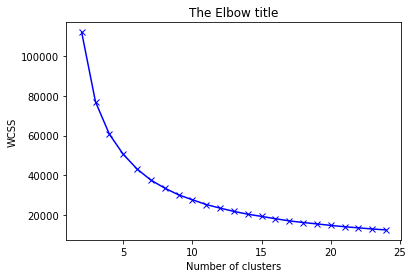

Silhouette coefficient


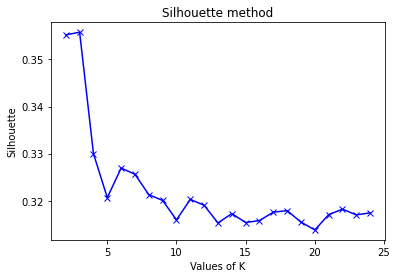

Max average silhouette score is : 0.35579  for n_clusters = 3
Gap statistics:
Optimal clusters:  3


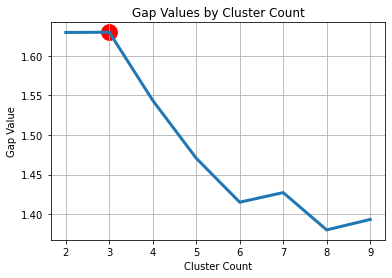

with minimum value 'method' the optimal number of clusters is: [2.]


In [72]:
# Determine ideal number of clusters for K-means
K=range(2,25)
data=["svd_scores_3"]

for i in range(len(data)):
    print(data[i].upper())
    find_the_ideal_number_of_clusters_kmeans(eval(data[i]), K)

There is a major drop at 5 clusters in the Silhouette graph. 

The Gap Values method recommends 3 clusters. 

### K-Means clustering on categorical + comorbidities



First, I need to transform the original dataframe with the categorical variables, so that the first 3 diagnoses of a patient are in one row per patient. This might help later when comparing clusters and responses of patients per cluster.

In [73]:
# concatenate rows of df_cat_diagnoses_cat_diagnoses df_cat_diagnoses because now the patients are duplicated 
temp=df_cat_diagnoses.groupby(['subject_id', 'hadm_id', 'icustay_id'])['icd9_groups'].apply(lambda x: ','.join(x)).reset_index()
temp=temp.rename(columns={"icd9_groups": "icd9_groups_conc"})
temp.head()


,subject_id,hadm_id,icustay_id,icd9_groups_conc
0,23,124321,234044,"neoplasms,diseases of the nervous system and s..."
1,34,144319,290505,"diseases of the circulatory system,diseases of..."
2,36,165660,241249,"diseases of the digestive system,diseases of t..."
3,85,112077,291697,"infectious and parasitic diseases,diseases of ..."
4,109,102024,240251,"diseases of the circulatory system,diseases of..."


In [74]:
# merge with diagnoses df
df_cat_diagnoses_conc=pd.merge(df_cat_diagnoses, temp, how="left", on=['subject_id', 'hadm_id', 'icustay_id'])
print(df_cat_diagnoses_conc.shape)
df_cat_diagnoses_conc.head()

(86167, 50)


,Unnamed: 0,subject_id,hadm_id,icustay_id,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,...,admission_year,age_groups,cluster5,cluster7,cluster10,seq_num,icd9_code,icd9_groups,diagnosis_count,icd9_groups_conc
0,0,55440,195768,228357,89.0,145.0,121.043478,74.0,127.0,106.586957,...,2008,senile age,5,1,5,1.0,5789,diseases of the digestive system,17,"diseases of the digestive system,diseases of t..."
1,0,55440,195768,228357,89.0,145.0,121.043478,74.0,127.0,106.586957,...,2008,senile age,5,1,5,2.0,51881,diseases of the respiratory system,17,"diseases of the digestive system,diseases of t..."
2,0,55440,195768,228357,89.0,145.0,121.043478,74.0,127.0,106.586957,...,2008,senile age,5,1,5,3.0,41071,diseases of the circulatory system,17,"diseases of the digestive system,diseases of t..."
3,0,55440,195768,228357,89.0,145.0,121.043478,74.0,127.0,106.586957,...,2008,senile age,5,1,5,4.0,42831,diseases of the circulatory system,17,"diseases of the digestive system,diseases of t..."
4,0,55440,195768,228357,89.0,145.0,121.043478,74.0,127.0,106.586957,...,2008,senile age,5,1,5,5.0,42732,diseases of the circulatory system,17,"diseases of the digestive system,diseases of t..."


In [75]:
df_cat_diagnoses_conc=df_cat_diagnoses_conc.drop_duplicates(subset=['subject_id', 'hadm_id', 'icustay_id', "icd9_groups_conc"])
df_cat_diagnoses_conc.shape

(17476, 50)

/Users/pazma/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


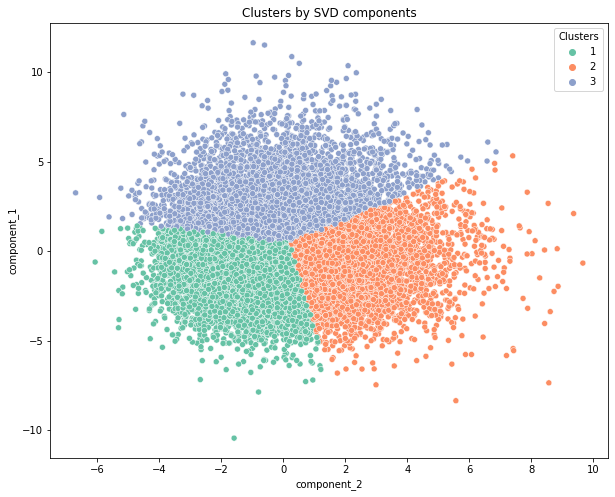

/Users/pazma/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


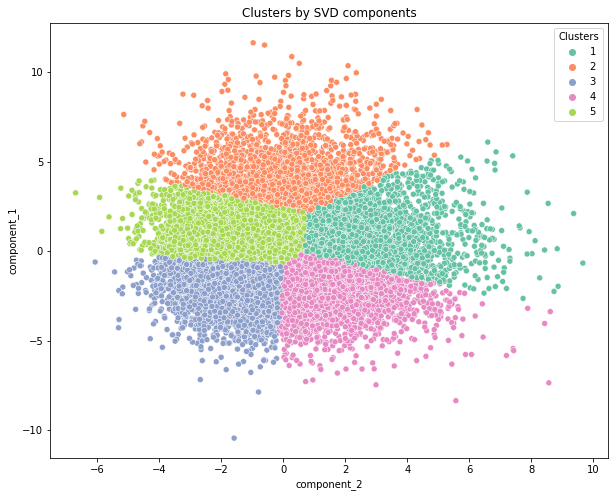

/Users/pazma/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


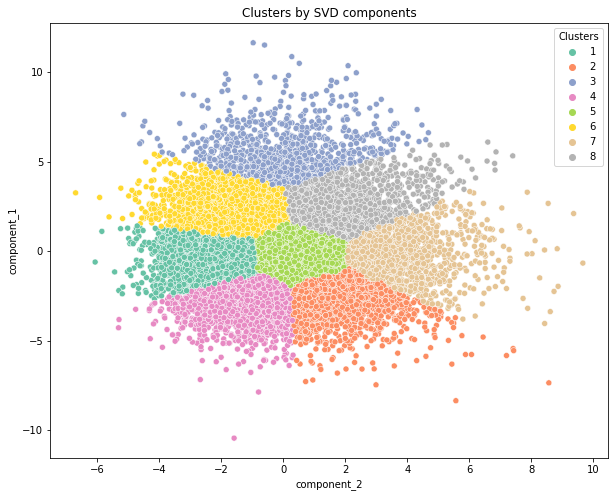

In [76]:
cluster3_df=fit_kmeans_on_svd(n_clusters=3, n_components=2, svd_scores=svd_scores_3, df_original=df_cat_diagnoses_conc)
cluster5_df=fit_kmeans_on_svd(n_clusters=5, n_components=2, svd_scores=svd_scores_3, df_original=df_cat_diagnoses_conc)

# I am also interested in the figure for 8 clusters
cluster8_df=fit_kmeans_on_svd(n_clusters=8, n_components=2, svd_scores=svd_scores_3, df_original=df_cat_diagnoses_conc)


## Explore relationship between clusters and outcomes of patients

In [77]:
# add clusters as new columns to the original dataframe
df_cat_diagnoses_conc["cluster3"]=cluster3_df.clusters.values
df_cat_diagnoses_conc["cluster5"]=cluster5_df.clusters.values
df_cat_diagnoses_conc["cluster8"]=cluster8_df.clusters.values

In [78]:
# import the response dataset which contains the outcomes of patients
response_df=pd.read_csv("mimic_unsupervised/mimic_unsupervised_response")
response_df.columns = [x.lower() for x in response_df.columns]
print(response_df.shape)
response_df.tail()

(17476, 6)


,unnamed: 0,subject_id,hadm_id,icustay_id,hospital_expire_flag,los
17471,20880,28043,135417,244530,0,11.6116
17472,20881,87605,191007,216116,0,1.1593
17473,20882,47492,152608,274507,0,1.8830
17474,20883,62946,191485,225930,0,3.1981
17475,20884,82638,112815,258400,0,1.0869


In [79]:
# merge with the original dataset with categories and diagnoses
diagnoses_responses=pd.merge(df_cat_diagnoses_conc,response_df, on =['subject_id', 'hadm_id', 'icustay_id'] )
diagnoses_responses.shape

(17476, 55)

In [80]:
# add new categorical variables to cluster_analysis_cols list
cat_cols=cluster_analysis_cols
cat_cols.append(['icd9_groups_conc','diagnosis_count'])
cat_cols=list(flatten(cat_cols))


### Clusters characterictisc

**Distribution of characteristics according 5 clusters**

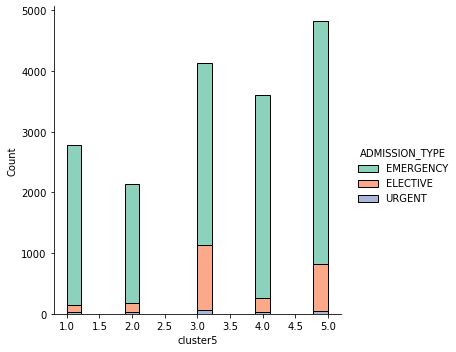

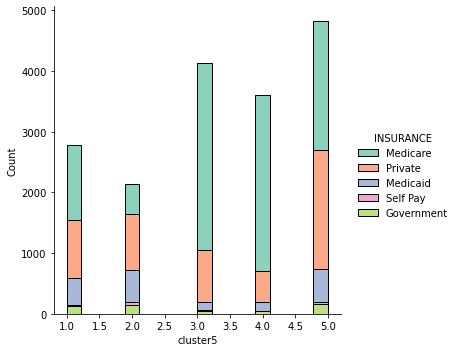

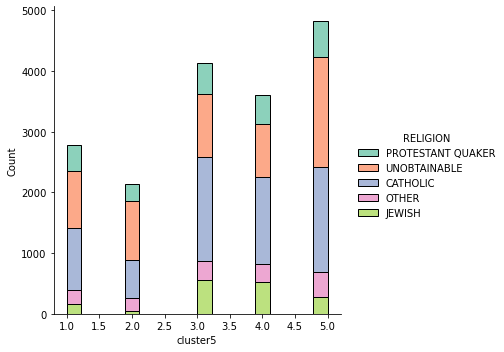

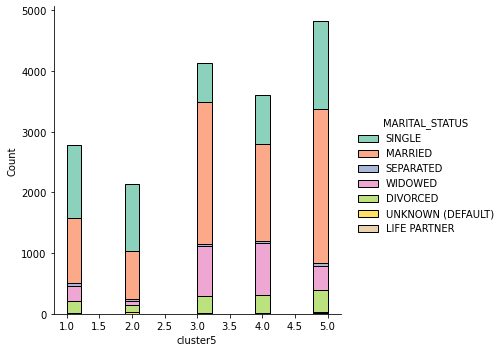

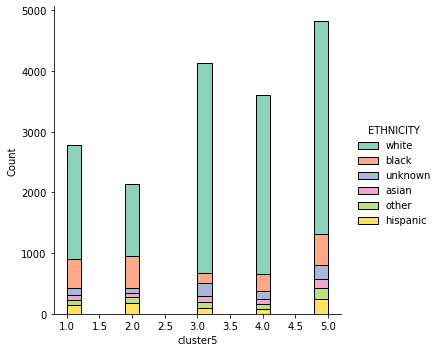

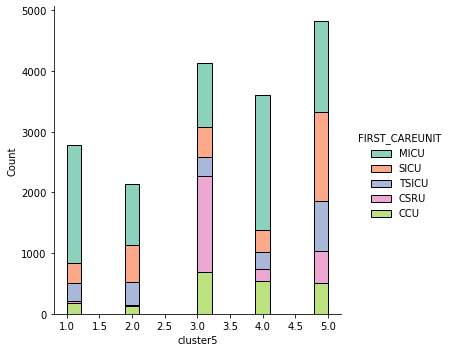

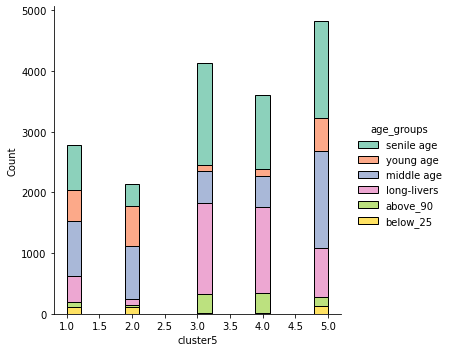

In [81]:
for i in np.arange(1,8): 
    sns.displot(diagnoses_responses, x="cluster5", hue=cat_cols[i], multiple="stack", palette="Set2")

### Patient outcomes by clusters and various categorical variables 

***Outcomes by age groups***

/var/folders/hc/qzy2rzvj5cg38v_607m73p640000gn/T/ipykernel_87296/4280348666.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  outcomes_by=diagnoses_responses.groupby([cluster_col,


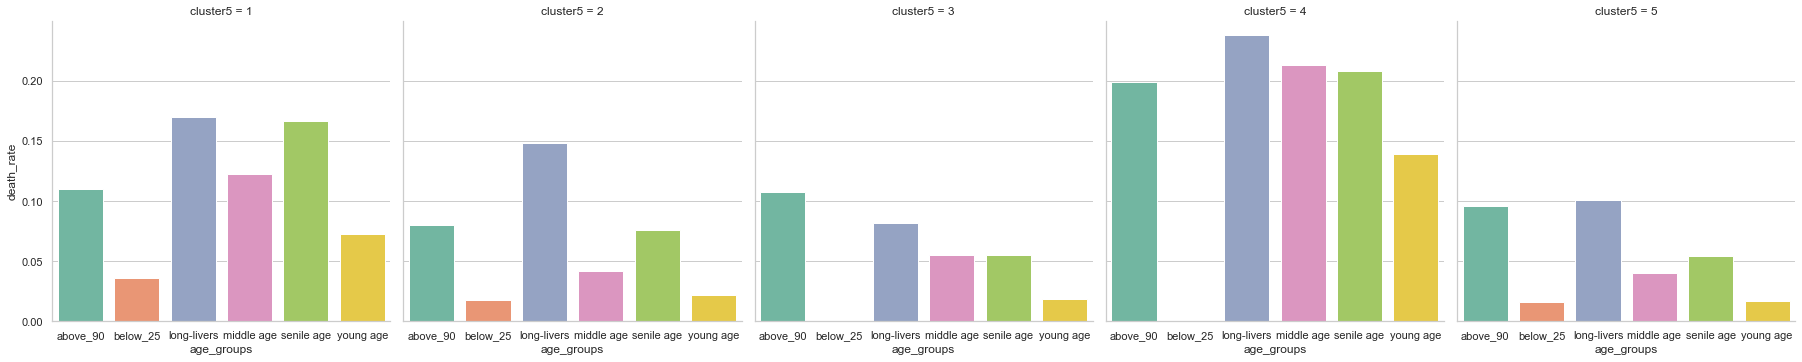

In [82]:
outcomes_barplots(diagnoses_responses, "cluster5", "age_groups")

In most of the clusters either patients who are above 90 or who are in the senile group have the highest death rate, as well as, they spend most of the time in the hospital. Interestingly, in cluster 5 the death rates are pretty high except for the below 25 age group. 

***Outcomes by marital status***

/var/folders/hc/qzy2rzvj5cg38v_607m73p640000gn/T/ipykernel_87296/4280348666.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  outcomes_by=diagnoses_responses.groupby([cluster_col,


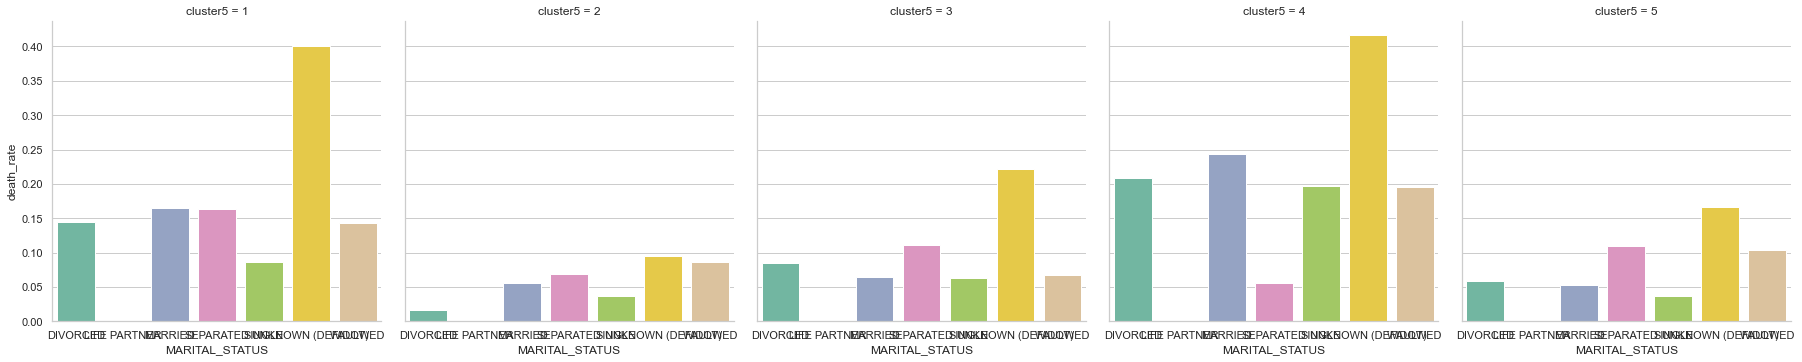

In [83]:
outcomes_barplots(diagnoses_responses, "cluster5", "MARITAL_STATUS")

Usually the unknown, separated/divorced or married categories have the highest death rates.

***Outcomes by gender***

/var/folders/hc/qzy2rzvj5cg38v_607m73p640000gn/T/ipykernel_87296/4280348666.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  outcomes_by=diagnoses_responses.groupby([cluster_col,


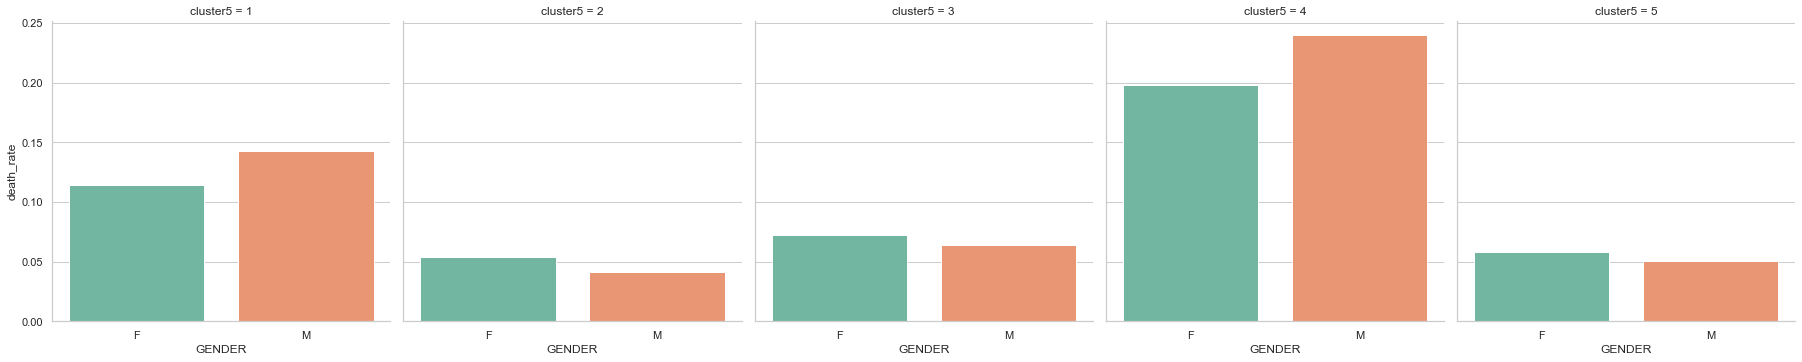

In [84]:
outcomes_barplots(diagnoses_responses, "cluster5", "GENDER")

There is no difference in this case. 

***Outcomes by ethnicity***

/var/folders/hc/qzy2rzvj5cg38v_607m73p640000gn/T/ipykernel_87296/4280348666.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  outcomes_by=diagnoses_responses.groupby([cluster_col,


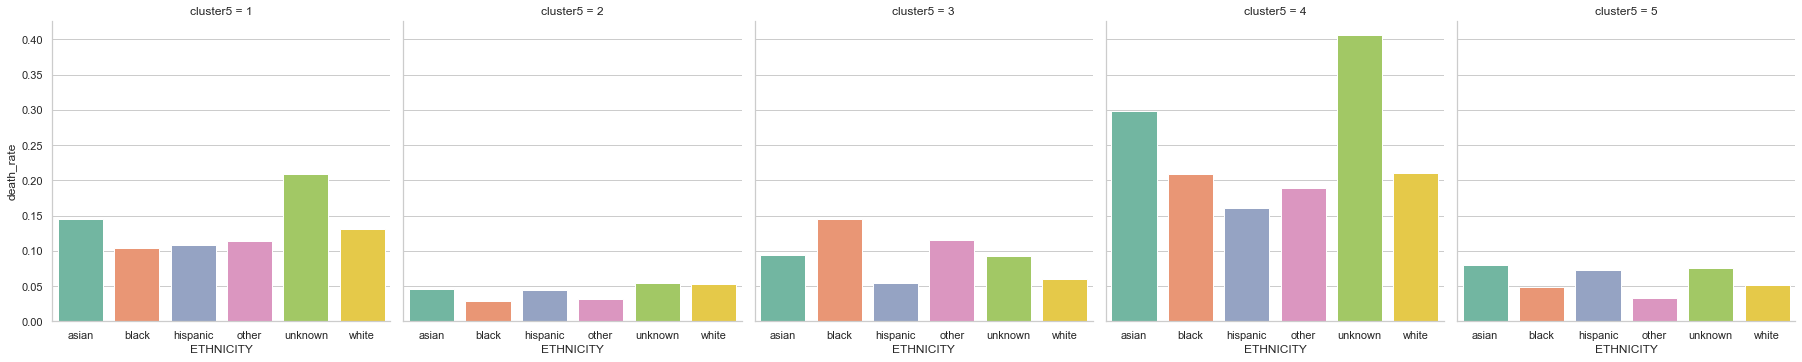

In [85]:
outcomes_barplots(diagnoses_responses, "cluster5", "ETHNICITY")

In cluster5 the death rate of the Asian group surprisingly high. We know that in that usually the death rate is quite high comparing it to the other clusters. However we can also see that Hispanic and Black groups'death rates are higher than White groups' death rates. 

**Most common diagnoses by clusters** 

In [86]:
pd.set_option('display.max_colwidth', None)
most_common_diagnoses_df=most_common_diagnoses_by_clusters(diagnoses_responses, "cluster5")
temp=most_common_diagnoses_df["icd9_groups_conc"].str.split(',', expand=True)[0]
most_common_diagnoses_df["main diagnose"]=temp
most_common_diagnoses_df=most_common_diagnoses_df.drop(columns=["icd9_groups_conc"])
most_common_diagnoses_df.columns=["cluster5", "number of occurences", "main diagnose"]
most_common_diagnoses_df

,cluster5,number of occurences,main diagnose
2168,1,11,injury and poisoning
1718,1,9,infectious and parasitic diseases
2062,1,7,injury and poisoning
4020,2,30,injury and poisoning
4019,2,14,injury and poisoning
3898,2,9,injury and poisoning
4563,3,83,diseases of the circulatory system
4570,3,57,diseases of the circulatory system
4608,3,32,diseases of the circulatory system
7467,4,27,diseases of the circulatory system


From this what we can conclude is that the most common first diagnosis of each patient is either injury and poisoning or disease of the circulatory system. 

## Extra: Binary Logistic Regression

Predict chence of death with the help of clusters. 

Since it is an unbalanced data I will apply the  `class_weight='balanced'` option and reweight values.

In [87]:
# add cluster column 
df_logistic=df_cat_diagnoses_dummies.copy()
df_logistic["cluster"]=diagnoses_responses["cluster5"].values

In [88]:
# create dummies from cluster column
df_logistic=get_dummies(df_logistic, ["cluster"])

In [89]:
# check missing values
df_logistic.isnull().values.any()

False

In [90]:
# Standardize data
scaler=StandardScaler()
scaler.fit(df_logistic)
X=scaler.transform(df_logistic)

# create target value from responses df: death dummy 
y=response_df.hospital_expire_flag.values

In [91]:
# Fit a basic Logistic Regression on the data
model=LogisticRegression(C=100, penalty="l2", solver='liblinear',
                     class_weight="balanced",max_iter=10000)

In [92]:
# fit and predict
model.fit(X, y)

LogisticRegression(C=100, class_weight='balanced', max_iter=10000,
                   solver='liblinear')

In [94]:
%run project3-functions.ipynb

Confusion Matrix 

[[14444  1258]
 [  611  1163]]


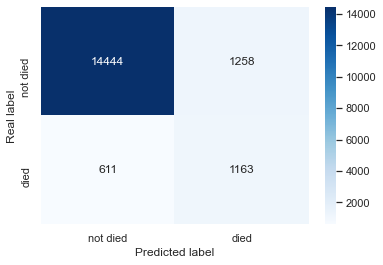

AUC:  0.9193829134714095


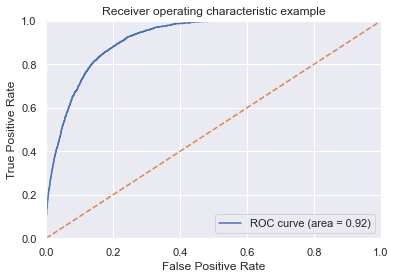

Classification report of the model: 
               precision    recall  f1-score   support

           0       0.96      0.92      0.94     15702
           1       0.48      0.66      0.55      1774

    accuracy                           0.89     17476
   macro avg       0.72      0.79      0.75     17476
weighted avg       0.91      0.89      0.90     17476

No cross-validation


In [101]:
### Evaluate model
# use my functions from my previous assignment
class_labels=["not died", "died"]
predict_and_evaluate_binary(X, y, model, crossval="No")

<Figure size 1440x1800 with 0 Axes>

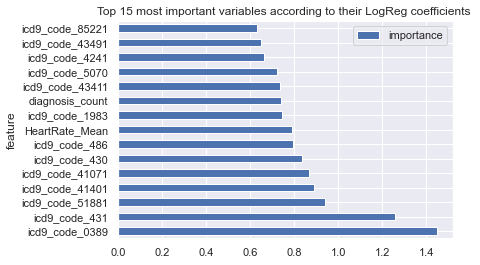

In [102]:
feature_names=list(df_logistic.columns)

feature_importance = pd.DataFrame(feature_names, columns = ["feature"])  # feature names defines in the jupyter notebook
feature_importance["importance"] = model.coef_[0]
feature_importance["importance_abs_value"] = feature_importance["importance"].abs()

feature_importance_top10 = feature_importance.sort_values(by = ["importance_abs_value"], ascending=False).head(15)

fig = plt.figure(figsize = (20,25))
ax = feature_importance_top10.plot.barh(x='feature', y='importance', 
                                           title="Top 15 most important variables according to their LogReg coefficients ")
plt.show()

<Figure size 1440x1800 with 0 Axes>

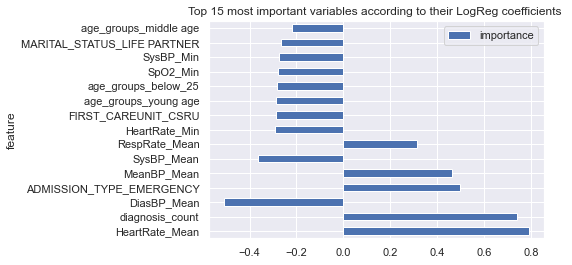

In [103]:
# feature importance if I exclude the icd9 diagnosis code dummies
temp = feature_importance[~feature_importance['feature'].astype(str).str.startswith('icd9_code')]
feature_imp_wo_icd9=temp.sort_values(by = ["importance_abs_value"], ascending=False).head(15)

fig = plt.figure(figsize = (20,25))
ax = feature_imp_wo_icd9.plot.barh(x='feature', y='importance', 
                                title="Top 15 most important variables according to their LogReg coefficients ")
plt.show()

One of the most important variable is the diagnosis count which gives us information about a patient's comobidities. We can also see that if a person is young then his/her chances of dying are decreasing, which is not suprising. Also if higher the patient's heart rate the higher the chance of death. 

Additionally, which is interesting for me is that if someone has a life partner that decreases his/her chances of dying. 